# Logistic Regression Exercises

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

## Problem 1: Binary Classification
## Running Logistic Regression on the Heart Dataset
- The dataset file is uploaded with this notebook as 'D6_Heart_Dataset_2.csv'. This dataset contains numeric data only.
- Source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download
- This heart disease dataset is used for binary classification. 
- The dataset contains 304 observations.
- It has 13 features and 1 class label with 0 and 1 values. 
- The attributes are discussed below.
1. Age in years
2. Gender (1 = male; 0 = female)
3. Cp chest pain type:  
   Value 1: typical angina,
   Value 2: atypical angina,
   Value 3: non-anginal pain
   Value 4: asymptomatic,
4. (trestbps) resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) serum cholestoral in mg/dl
6. (fbs) (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. (restecg) resting electrocardiographic results
8. (thalach) maximum heart rate achieved
9. (exang) exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) ST depression induced by exercise relative to rest
11. (slope) the slope of the peak exercise ST segment
12. (ca) number of major vessels (0-3) colored by flourosopy
13. (thal) 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target 1 or 0 (num) (the predicted attribute) diagnosis of heart disease (angiographic disease status):
    Value 0: < 50% diameter narrowing,
    Value 1: > 50% diameter narrowing,


In [2]:
#Loading and viewing the dataset
dataset=pd.read_csv('D6_Heart_Dataset_2.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#Moving features and target into separate dataframes
features=dataset.drop('target',axis=1)
target=dataset['target']
#Splitting the dataset into train and test 
X_train,X_test,Y_train,Y_test = train_test_split(features, target,test_size=0.2,random_state=0)

### Model 1: Running Logictic Regression with standard settings
- Regularization is applied by default in LogisticRegression.

In [4]:
%%time

#Creating logistic regression object
#logistic_regression_model1 = LogisticRegression()
logistic_regression_model1 = LogisticRegression(max_iter=1000)

#Use the following statement if you want to try another solver like 'liblinear', otherwise default solver is 'lbfgs'.
#logistic_regression_model1 = LogisticRegression(solver="liblinear", random_state=0)

# Train model
model1 = logistic_regression_model1.fit(X_train, Y_train)

Wall time: 215 ms


In [5]:
#Making predictions on test data
Y_pred_model1 = model1.predict(X_test)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_model1)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_model1))
print('Precision: ',metrics.precision_score(Y_test,Y_pred_model1))
print('Recall score: ',metrics.recall_score(Y_test,Y_pred_model1))
print('F1 score: ',metrics.f1_score(Y_test,Y_pred_model1))

The accuracy is 85.24590163934425%
[[21  6]
 [ 3 31]]
Precision:  0.8378378378378378
Recall score:  0.9117647058823529
F1 score:  0.8732394366197184


### Model 2: Running Logistic Regression with scaling (standardization)
- Both test and train sets need to be scaled.

In [6]:
#Let us see values in X_train
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [7]:
#Standardizing train data
standard_scaler = preprocessing.StandardScaler()
X_train_standardized=pd.DataFrame(standard_scaler.fit_transform(X_train)) # returns standardized array
X_train_standardized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.327733,-1.436416,0.985842,-0.574125,-0.632674,-0.418040,0.901639,0.656262,-0.709299,-0.724609,-0.661693,-0.707107,-0.464729
1,1.249032,-1.436416,0.985842,0.831066,0.585437,-0.418040,-0.979367,0.094007,-0.709299,-0.892493,-0.661693,0.265165,-0.464729
2,0.352766,0.696177,0.985842,0.479768,-0.670155,2.392117,-0.979367,0.656262,-0.709299,-0.892493,0.955779,-0.707107,-0.464729
3,0.912932,-1.436416,-0.922749,-0.457026,-0.932517,-0.418040,0.901639,-0.597999,1.409842,-0.892493,-0.661693,-0.707107,-0.464729
4,0.240733,0.696177,0.031547,1.299463,-0.276611,-0.418040,-0.979367,0.613011,-0.709299,-0.892493,0.955779,0.265165,-0.464729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,-1.327733,0.696177,-0.922749,0.011371,0.004491,2.392117,-0.979367,-0.295246,1.409842,-0.808551,-0.661693,3.181981,1.141906
238,-0.095367,0.696177,-0.922749,-0.691224,-1.101178,-0.418040,0.901639,-1.592757,-0.709299,0.282698,-0.661693,0.265165,1.141906
239,0.128699,0.696177,1.940138,-0.691224,-1.007478,-0.418040,-0.979367,0.526511,-0.709299,0.702409,-0.661693,-0.707107,1.141906
240,-0.879600,0.696177,0.985842,0.362669,0.191893,-0.418040,-0.979367,0.267008,-0.709299,-0.892493,0.955779,-0.707107,-0.464729


In [8]:
#Standardizing test data
X_test_standardized=pd.DataFrame(standard_scaler.fit_transform(X_test))
X_test_standardized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.875286,0.621582,-1.010061,0.738068,-1.572318,-0.416025,0.891133,-1.097075,1.545603,1.627483,-2.262328,-0.745049,1.064362
1,1.234432,0.621582,2.122840,2.046851,-0.386846,-0.416025,-1.122167,0.278026,-0.646997,-0.340336,-0.599653,-0.745049,1.064362
2,0.700387,0.621582,2.122840,2.046851,0.977565,-0.416025,-1.122167,0.461373,-0.646997,-0.733900,-0.599653,-0.745049,1.064362
3,0.807196,0.621582,-1.010061,-0.308959,0.306543,-0.416025,-1.122167,-0.363688,1.545603,1.824265,-0.599653,0.264906,1.064362
4,1.020814,0.621582,1.078539,-0.047202,-0.297376,-0.416025,0.891133,-0.134504,-0.646997,0.840355,-0.599653,2.284818,1.064362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,-0.901748,-1.608799,1.078539,-0.675418,-0.051335,-0.416025,0.891133,0.003006,-0.646997,-0.635509,-0.599653,0.264906,-0.739140
57,0.486769,-1.608799,0.034239,-0.047202,-0.185539,-0.416025,-1.122167,1.148923,-0.646997,-0.930681,-0.599653,0.264906,-0.739140
58,0.700387,0.621582,1.078539,0.999824,-0.722357,2.403701,0.891133,0.369699,-0.646997,0.643574,1.063022,-0.745049,-0.739140
59,-0.260894,-1.608799,0.034239,-0.570715,-0.006600,-0.416025,0.891133,0.598883,-0.646997,0.151619,1.063022,-0.745049,-0.739140


In [9]:
%%time
#Creating logistic regression object
logistic_regression_model2 = LogisticRegression() #converged faster, no need to increase max_iter

#Training the model
model2 = logistic_regression_model2.fit(X_train_standardized, Y_train)

Wall time: 9.71 ms


Notice the reduction in wall time with scaled data.

In [10]:
#Making predictions on test data
Y_pred_model2 = model2.predict(X_test_standardized)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_model2)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_model2))
print('Precision: ',metrics.precision_score(Y_test,Y_pred_model2))
print('Recall score: ',metrics.recall_score(Y_test,Y_pred_model2))
print('F1 score: ',metrics.f1_score(Y_test,Y_pred_model2))

The accuracy is 85.24590163934425%
[[21  6]
 [ 3 31]]
Precision:  0.8378378378378378
Recall score:  0.9117647058823529
F1 score:  0.8732394366197184


In [11]:
d=confusion_matrix(Y_test, Y_pred_model2)
d.diagonal()

array([21, 31], dtype=int64)

### Model 3: Running Logistic Regression with scaling (Normalization)
- Both test and train sets need to be scaled.

In [12]:
#Normalizing the train data
normal_scaler = preprocessing.MinMaxScaler()
X_train_normalized=pd.DataFrame(normal_scaler.fit_transform(X_train)) # returns standardized array
X_train_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.291667,0.0,0.666667,0.285714,0.189376,0.0,0.5,0.717557,0.0,0.032258,0.5,0.00,0.666667
1,0.770833,0.0,0.666667,0.530612,0.339492,0.0,0.0,0.618321,0.0,0.000000,0.5,0.25,0.666667
2,0.604167,1.0,0.666667,0.469388,0.184758,1.0,0.0,0.717557,0.0,0.000000,1.0,0.00,0.666667
3,0.708333,0.0,0.000000,0.306122,0.152425,0.0,0.5,0.496183,1.0,0.000000,0.5,0.00,0.666667
4,0.583333,1.0,0.333333,0.612245,0.233256,0.0,0.0,0.709924,0.0,0.000000,1.0,0.25,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.291667,1.0,0.000000,0.387755,0.267898,1.0,0.0,0.549618,1.0,0.016129,0.5,1.00,1.000000
238,0.520833,1.0,0.000000,0.265306,0.131640,0.0,0.5,0.320611,0.0,0.225806,0.5,0.25,1.000000
239,0.562500,1.0,1.000000,0.265306,0.143187,0.0,0.0,0.694656,0.0,0.306452,0.5,0.00,1.000000
240,0.375000,1.0,0.666667,0.448980,0.290993,0.0,0.0,0.648855,0.0,0.000000,1.0,0.00,0.666667


In [13]:
#Normalizing the test data
X_test_normalized=pd.DataFrame(normal_scaler.fit_transform(X_test)) # returns standardized array
X_test_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.897436,1.0,0.000000,0.481132,0.169611,0.0,1.0,0.288660,1.0,0.650,0.0,0.00,1.0
1,0.743590,1.0,1.000000,0.716981,0.356890,0.0,0.0,0.597938,0.0,0.150,0.5,0.00,1.0
2,0.615385,1.0,1.000000,0.716981,0.572438,0.0,0.0,0.639175,0.0,0.050,0.5,0.00,1.0
3,0.641026,1.0,0.000000,0.292453,0.466431,0.0,0.0,0.453608,1.0,0.700,0.5,0.25,1.0
4,0.692308,1.0,0.666667,0.339623,0.371025,0.0,1.0,0.505155,0.0,0.450,0.5,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.230769,0.0,0.666667,0.226415,0.409894,0.0,1.0,0.536082,0.0,0.075,0.5,0.25,0.5
57,0.564103,0.0,0.333333,0.339623,0.388693,0.0,0.0,0.793814,0.0,0.000,0.5,0.25,0.5
58,0.615385,1.0,0.666667,0.528302,0.303887,1.0,1.0,0.618557,0.0,0.400,1.0,0.00,0.5
59,0.384615,0.0,0.333333,0.245283,0.416961,0.0,1.0,0.670103,0.0,0.275,1.0,0.00,0.5


In [14]:
%%time
#Creating logistic regression object
logistic_regression_model3 = LogisticRegression() #converged faster, no need to increase max_iter

#Training the model
model3 = logistic_regression_model3.fit(X_train_normalized, Y_train)

Wall time: 6.98 ms


In [15]:
#Making predictions
Y_pred_model3 = model3.predict(X_test_normalized)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_model3)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_model3))
print('Precision: ',metrics.precision_score(Y_test,Y_pred_model3))
print('Recall score: ',metrics.recall_score(Y_test,Y_pred_model3))
print('F1 score: ',metrics.f1_score(Y_test,Y_pred_model3))

The accuracy is 85.24590163934425%
[[21  6]
 [ 3 31]]
Precision:  0.8378378378378378
Recall score:  0.9117647058823529
F1 score:  0.8732394366197184


### Model 4: Running K-Nearest Neighbour (a non-parametric algorithm)

In [16]:
model4 = KNeighborsClassifier()
model4.fit(X_train, Y_train)
Y_pred_model4 = pd.DataFrame(model4.predict(X_test))
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_model4)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_model4))
print('Precision: ',metrics.precision_score(Y_test,Y_pred_model4))
print('Recall score: ',metrics.recall_score(Y_test,Y_pred_model4))
print('F1 score: ',metrics.f1_score(Y_test,Y_pred_model4))

The accuracy is 63.934426229508205%
[[17 10]
 [12 22]]
Precision:  0.6875
Recall score:  0.6470588235294118
F1 score:  0.6666666666666667


## Problem 2: Multiclass Classification
## Running Logistic Regression on number dataset from sklearn
- This dataset is one of the toy datasets of sklearn module.
- Contains 1797 training examples.
- Each training example is an 8x8 image of a hand-written digit.
- Total classes: 10 (1 for each digit from 0 to 9)
- Samples per class: 180 (approx)
- Dimensions: 64
- For more information visit: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

### Loading and exploring the number dataset fron sklearn

In [21]:
#Loading dataset from sklearn
digit_dataset=load_digits()

In [22]:
#Printing description of the dataset
print(dir(digit_dataset))
print(digit_dataset.DESCR)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into 

In [23]:
#Displaying features
digit_dataset.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [24]:
#Displaying target
digit_dataset.target

array([0, 1, 2, ..., 8, 9, 8])

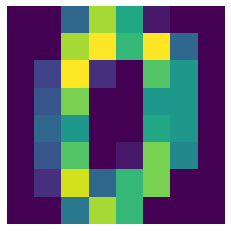

In [25]:
#Taking a peak on one of the images
some_digit = digit_dataset.data[0]
plt.imshow(some_digit.reshape(8, 8))
plt.axis("off")
plt.show()

In [28]:
#Looks like a 0, let's check the corresponding target value
digit_dataset.target[0]

0

In [29]:
#Splitting the dataset
X2_train,X2_test,Y2_train,Y2_test = train_test_split(digit_dataset.data, digit_dataset.target,test_size=0.2,random_state=0)

### Model 5: Running Logistic Regression
- The model in Problem 2 is number 5 just to avoid name clashes with models of problem 1.

In [ ]:
%%time
#Creating logistic regression object
#logistic_regression_model5 = LogisticRegression()
logistic_regression_model5 = LogisticRegression(max_iter=10000)
#Training the model
model5 = logistic_regression_model5.fit(X2_train, Y2_train)

In [ ]:
#Making predictions
Y2_pred_model5 = model5.predict(X2_test)
print("The accuracy is "+str(metrics.accuracy_score(Y2_test,Y2_pred_model5)*100)+"%")
c_matrix=confusion_matrix(Y2_test, Y2_pred_model5)
print(c_matrix)
print('Precision: ',metrics.precision_score(Y2_test,Y2_pred_model5,average=None))
print('Micro Precision: ',metrics.precision_score(Y2_test,Y2_pred_model5,average='micro'))
print('Macro Precision: ',metrics.precision_score(Y2_test,Y2_pred_model5,average='macro'))
print('Weighted Precision: ',metrics.precision_score(Y2_test,Y2_pred_model5,average='weighted'))
print()
print('Recall score: ',metrics.recall_score(Y2_test,Y2_pred_model5,average=None))
print('Micro Recall score: ',metrics.recall_score(Y2_test,Y2_pred_model5,average='micro'))
print('Macro Recall score: ',metrics.recall_score(Y2_test,Y2_pred_model5,average='macro'))
print('Weighted Recall score: ',metrics.recall_score(Y2_test,Y2_pred_model5,average='weighted'))
print()
print('F1 score: ',metrics.f1_score(Y2_test,Y2_pred_model5,average=None))
print('Micro F1 score: ',metrics.f1_score(Y2_test,Y2_pred_model5,average='micro'))
print('Macro F1 score: ',metrics.f1_score(Y2_test,Y2_pred_model5,average='macro'))
print('Weighted F1 score: ',
      metrics.f1_score(Y2_test,Y2_pred_model5,average='weighted'))


## Problem 3: Multiclass Multioutput Classification

### Creating two labels (outputs) on same data
- Label 1: For large numbers greater than 7
- Label 2: For odd numbers

In [ ]:
#Creating two labels for train data
y2_train_large = np.array(Y2_train >= 7)
y2_multilabel_train = pd.DataFrame(data=y2_train_large, columns=['large'])
y2_train_odd = np.array(Y2_train % 2 == 1)
y2_multilabel_train['odd'] = y2_train_odd
y2_multilabel_train

In [ ]:
#Creating two labels for test data
y2_test_large = np.array(Y2_test >= 7)
y2_multilabel_test = pd.DataFrame(data=y2_test_large, columns=['large'])
y2_test_odd = np.array(Y2_test % 2 == 1)
y2_multilabel_test['odd'] = y2_test_odd
y2_multilabel_test

### Model 6: Running K-Nearest Neighbours on multiclass output

In [ ]:
#Running K-Nearest Neighbours on train data and testing on test data
model6 = KNeighborsClassifier()
model6.fit(X2_train, y2_multilabel_train)
Y2_pred_model6 = pd.DataFrame(model6.predict(X2_test),columns=['large','odd'])

In [ ]:
#c_matrix for 'large'
c_matrix_large=confusion_matrix(y2_multilabel_test['large'], Y2_pred_model6['large'])
print(c_matrix_large)
print('Precision: ',metrics.precision_score(y2_multilabel_test['large'], Y2_pred_model6['large']))
print('Recall score: ',metrics.recall_score(y2_multilabel_test['large'], Y2_pred_model6['large']))
print('F1 score: ',metrics.f1_score(y2_multilabel_test['large'], Y2_pred_model6['large']))

In [ ]:
#c_matrix for 'odd'
c_matrix_odd=confusion_matrix(y2_multilabel_test['odd'], Y2_pred_model6['odd'])
print(c_matrix_odd)
print('Precision: ',metrics.precision_score(y2_multilabel_test['odd'], Y2_pred_model6['odd']))
print('Recall score: ',metrics.recall_score(y2_multilabel_test['odd'], Y2_pred_model6['odd']))
print('F1 score: ',metrics.f1_score(y2_multilabel_test['odd'], Y2_pred_model6['odd']))

### Model 7: Running Logistic Regression on multiclass output
- Unlike K-Nearest Neighbours, logistic regression doesnot support multioutput classification directly.
- We will have to run it separately on each output.

In [ ]:
#Running Logistic Regression on first output 'large'

#Creating logistic regression object
logistic_regression_model7 = LogisticRegression(random_state=0, max_iter=10000)
#Training the model
model7_large = logistic_regression_model7.fit(X2_train, y2_multilabel_train['large'])
model7_odd = logistic_regression_model7.fit(X2_train, y2_multilabel_train['odd'])

In [ ]:
#Making predictions for output 'large'
Y2_pred_model7 = model7_large.predict(X2_test)
print("The accuracy is "+str(metrics.accuracy_score(y2_multilabel_test['large'],Y2_pred_model7)*100)+"%")
c_matrix=confusion_matrix(y2_multilabel_test['large'],Y2_pred_model7)
print(c_matrix)
print('Precision: ',metrics.precision_score(y2_multilabel_test['large'],Y2_pred_model7))
print('Recall score: ',metrics.recall_score(y2_multilabel_test['large'],Y2_pred_model7))
print('F1 score: ',metrics.f1_score(y2_multilabel_test['large'],Y2_pred_model7))

In [ ]:
#Making predictions for output 'odd'
Y2_pred_model7 = model7_odd.predict(X2_test)
print("The accuracy is "+str(metrics.accuracy_score(y2_multilabel_test['odd'],Y2_pred_model7)*100)+"%")
c_matrix=confusion_matrix(y2_multilabel_test['odd'],Y2_pred_model7)
print(c_matrix)
print('Precision: ',metrics.precision_score(y2_multilabel_test['odd'],Y2_pred_model7))
print('Recall score: ',metrics.recall_score(y2_multilabel_test['odd'],Y2_pred_model7))
print('F1 score: ',metrics.f1_score(y2_multilabel_test['odd'],Y2_pred_model7))